In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
! ls -lrt  ../comparison/lifetime_ar/*/ | tail

-rw-r--r--  1 lukas  staff  14100 Jan 27 13:26 lifetime_dt200_ala_h.txt
-rw-r--r--  1 lukas  staff  22425 Jan 27 13:26 lifetime_dt200_ala_c_md.txt
-rw-r--r--  1 lukas  staff  29325 Jan 27 13:26 lifetime_dt1_ala_h.txt
-rw-r--r--  1 lukas  staff  72750 Jan 27 13:26 lifetime_dt1_ala_c_md.txt
-rw-r--r--  1 lukas  staff  35400 Jan 27 13:26 lifetime_dt10_ala_h.txt
-rw-r--r--  1 lukas  staff  66000 Jan 27 13:26 lifetime_dt10_ala_c_md.txt
-rw-r--r--  1 lukas  staff  23175 Jan 27 13:26 lifetime_dt100_ala_h.txt
-rw-r--r--  1 lukas  staff  35775 Jan 27 13:26 lifetime_dt100_ala_c_md.txt
-rw-r--r--  1 lukas  staff   2925 Jan 27 13:26 lifetime_dt1000_ala_h.txt
-rw-r--r--  1 lukas  staff   4575 Jan 27 13:26 lifetime_dt1000_ala_c_md.txt


In [9]:
lag_time_l = [1, 2, 5, 10, 20, 25, 50, 100, 200, 500, 1000, 2500, 5000]

In [10]:
remd_dt_hdw_d = {}
remd_dt_cdw_d = {}

for k in lag_time_l:
    #print k
    #wa_tau_a_ar = np.column_stack((v.weight.values, v.weight.values / sum(v.weight.values),  v.wait_T.values))
    w_tau_a_ar = np.genfromtxt("../comparison/lifetime_ar/helix/lifetime_dt{}_ala_h.txt".format(k))
    remd_dt_hdw_d[k] = w_tau_a_ar
    
    w_tau_a_ar = np.genfromtxt("../comparison/lifetime_ar/coil/lifetime_dt{}_ala_h.txt".format(k))
    #np.savetxt("lifetime_ar/coil/lifetime_dt{}_ala_h.txt".format(k), wa_tau_a_ar)
    remd_dt_cdw_d[k] = w_tau_a_ar 

In [12]:
md_dt_hdw_d = {}
md_dt_cdw_d = {}

for k in lag_time_l:
    w_tau_a_ar = np.genfromtxt("../comparison/lifetime_ar/helix/lifetime_dt{}_ala_h_md.txt".format(k))
    md_dt_hdw_d[k] = w_tau_a_ar  
    
    ar = np.genfromtxt("../comparison/lifetime_ar/coil/lifetime_dt{}_ala_c_md.txt".format(k))
    md_dt_cdw_d[k] = ar

In [13]:
def mean_tau_w(tau_a, w_a):
    return np.average( tau_a / w_a, weights=w_a)

def var_tau_w(tau_a, w_a, av):
    return np.sum( w_a*(tau_a/w_a - av)**2) / (np.sum(w_a) )


def check_moments_w(tau_a, w_a):
    _av = mean_tau_w(tau_a, w_a)
    _var = var_tau_w(tau_a, w_a, _av)
    return _av, _var

In [14]:
pwd

u'/Users/lukas/Projects/kinetics/delta_obs/ala2/tau_var'

In [16]:
! ls ../synthetic/var_dt/

var_lifetimes_c.txt   var_lifetimes_st3.txt
var_lifetimes_h.txt   var_lifetimes_st4.txt


In [60]:
mcmc_var_h = np.genfromtxt("../synthetic/var_dt/var_lifetimes_h.txt")
mcmc_var_c = np.genfromtxt("../synthetic/var_dt/var_lifetimes_c.txt")
mcmc_var_3 = np.genfromtxt("../synthetic/var_dt/var_lifetimes_st3.txt")
mcmc_var_4 = np.genfromtxt("../synthetic/var_dt/var_lifetimes_st4.txt")

In [61]:
md_dt_hdw_d[1]

array([[  1.00000000e+00,   1.03626943e-03,   6.30000000e+01],
       [  1.00000000e+00,   1.03626943e-03,   1.49000000e+02],
       [  1.00000000e+00,   1.03626943e-03,   1.14000000e+02],
       ..., 
       [  1.00000000e+00,   1.03626943e-03,   1.01000000e+02],
       [  1.00000000e+00,   1.03626943e-03,   8.00000000e+00],
       [  1.00000000e+00,   1.03626943e-03,   1.05000000e+02]])

In [62]:
cl = sns.color_palette()

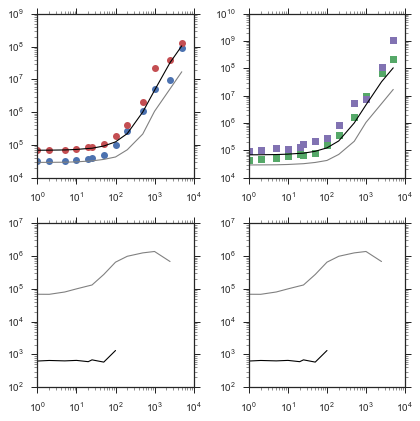

In [63]:
fig, ax = plt.subplots(2,2, figsize=(6,6))
sns.set_style('ticks')

for k, v in md_dt_hdw_d.items():
    _a, _v = check_moments_w(v[:,-1], v[:,0])
    ax[0,0].plot(k, _v, "o", c=cl[0])
    


for k, v in md_dt_cdw_d.items():
    _a, _v = check_moments_w(v[:,-1], v[:,0])
    ax[0,0].plot(k, _v, "o", c=cl[2])
    


for k, v in remd_dt_hdw_d.items():
    _a, _v = check_moments_w(v[:,-1], v[:,0])
    ax[0,1].plot(k, _v, "s", c=cl[1])
    
for k, v in remd_dt_cdw_d.items():
    _a, _v = check_moments_w(v[:,-1], v[:,0])
    ax[0,1].plot(k, _v, "s", c=cl[3])

for a in ax[0,:]:
    a.plot(mcmc_var_h[:,0], mcmc_var_h[:,1], c='gray', lw=1.1)
    a.plot(mcmc_var_c[:,0], mcmc_var_c[:,1], c='k', lw=1.1)
    
for a in ax[1,:]:
    a.plot(mcmc_var_3[:,0], mcmc_var_3[:,1], c='gray', lw=1.1)
    a.plot(mcmc_var_4[:,0], mcmc_var_4[:,1], c='k', lw=1.1)
    a.loglog()
    
for a in ax[0,:]:
    a.loglog()
    
fig.tight_layout()